In [13]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [27]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

In [18]:
imin, imax = 350, 600
jmin, jmax = 150, 350

In [53]:
def make_plots(fig, ax, variable, name, ng, hd, cmap):
    green = np.array(ng.variables[variable][0])
    hind = np.array(hd.variables[variable][0])


    colors = axs[0, 0].pcolormesh(green[0, imin:imax, jmin:jmax], cmap=cm.thermal)
    fig.colorbar(colors, ax=axs[0, 0])

    colors = axs[0, 1].pcolormesh(hind[0, imin:imax, jmin:jmax], cmap=cm.thermal)
    fig.colorbar(colors, ax=axs[0, 1])

    vmax = np.nanmax(np.absolute(hind[0] - green[0]))
    print(vmax)
    colors = axs[0, 2].pcolormesh(hind[0, imin:imax, jmin:jmax] - green[0, imin:imax, jmin:jmax], cmap=cm.curl, vmax=vmax, vmin=-vmax)
    fig.colorbar(colors, ax=axs[0, 2])

    for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
        viz_tools.set_aspect(ax)
    
    cbar = vis.contour_thalweg(axs[1, 0], green, bathy, mesh, name, cmap=cmap)
    cbar = vis.contour_thalweg(axs[1, 1], hind, bathy, mesh, name, cmap=cmap)
    cbar = vis.contour_thalweg(axs[1, 2], hind-green, bathy, mesh, np.arange(-vmax, vmax, 0.1*vmax), cmap=cm.curl)

In [ ]:
ng = xr.open_dataset('ng_feb15_mean_grid_T.nc')
hd = xr.open_dataset('hd_feb15_mean_grid_T.nc')

1.33548


/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


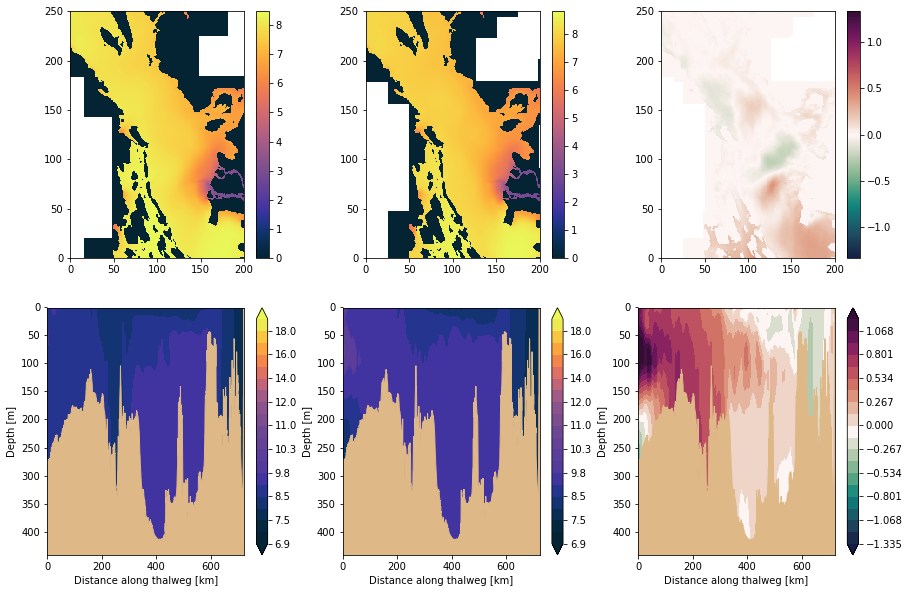

In [55]:
variable, name, cmap = 'votemper', 'temperature', cm.thermal
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
make_plots(fig, ax, variable, name, ng, hd, cmap)

3.85742


/home/sallen/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


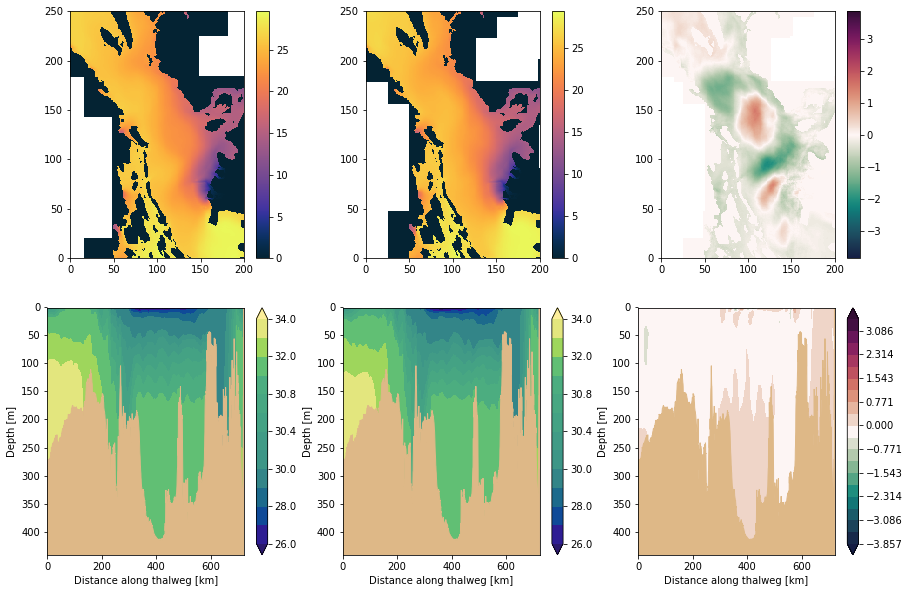

In [57]:
variable, name, cmap = 'vosaline', 'salinity', cm.haline
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
make_plots(fig, ax, variable, name, ng, hd, cmap)